# SW_DutchCoast

Validate MIKE 21 Spectral wave model for the Dutch coast.

In [1]:
import modelskill as ms

In [2]:
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('png')

In [3]:
fn = '../tests/testdata/SW/HKZN_local_2017_DutchCoast.dfsu'
mr = ms.ModelResult(fn, name='HKZN_local', item=0)
mr.data

Dfsu2D
number of elements: 958
number of nodes: 570
projection: LONG/LAT
number of items: 15
time: 23 steps with dt=10800.0s
      2017-10-27 00:00:00 -- 2017-10-29 18:00:00

## Define observations

In [4]:
o1 = ms.PointObservation('../tests/testdata/SW/HKNA_Hm0.dfs0', item=0, x=4.2420, y=52.6887, name="HKNA")
o2 = ms.PointObservation("../tests/testdata/SW/eur_Hm0.dfs0", item=0, x=3.2760, y=51.9990, name="EPL")

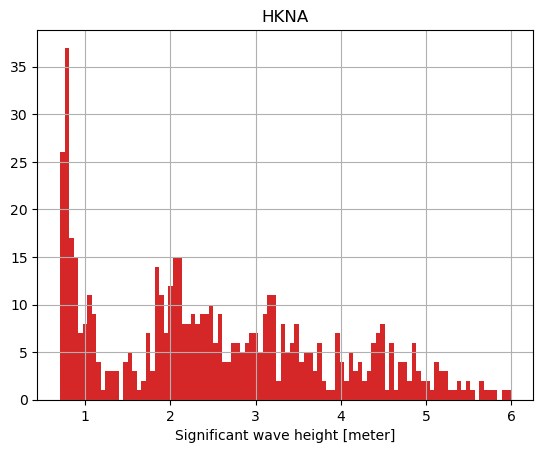

In [5]:
o1.hist();

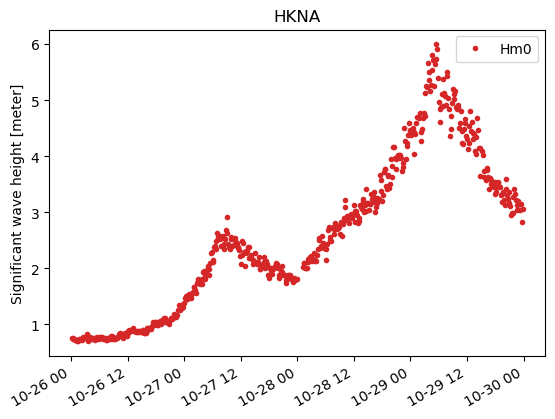

In [6]:
o1.plot(); 

In [7]:
o3 = ms.TrackObservation("../tests/testdata/SW/Alti_c2_Dutch.dfs0", item=3, name="c2")
o3.data.head()

,x,y,swh
2017-10-27 12:52:52.337,2.422854,51.253353,1.638
2017-10-27 12:52:53.280,2.413789,51.310268,1.383
2017-10-27 12:52:54.224,2.404711,51.367184,1.791
2017-10-27 12:52:55.167,2.395619,51.424099,1.700
2017-10-27 12:52:56.111,2.386516,51.481014,1.800


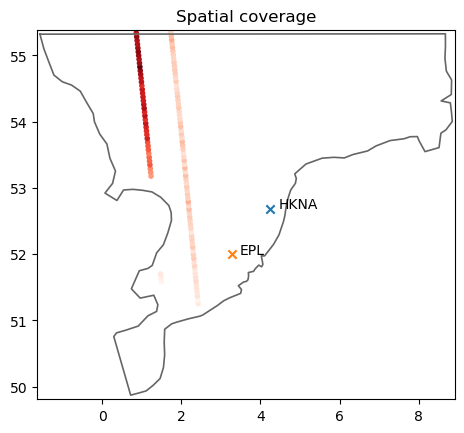

In [8]:
ms.plot_spatial_overview([o1, o2, o3], mr);

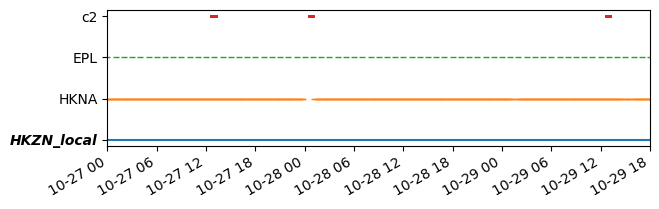

In [9]:
ms.plot_temporal_coverage([o1, o2, o3], mr);

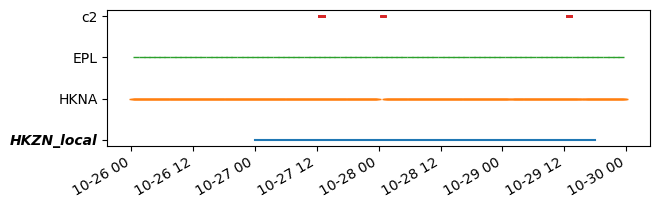

In [10]:
ms.plot_temporal_coverage([o1, o2, o3], mr, limit_to_model_period=False);

## Compare observations and model result

In [11]:
# TODO: replace with cc = ms.compare([o1, o2, o3], mr)
con = ms.Connector([o1, o2, o3], mr)
con.observations

{'HKNA': PointObservation: HKNA, x=4.242, y=52.6887,
 'EPL': PointObservation: EPL, x=3.276, y=51.999,
 'c2': TrackObservation: c2, n=298}

In [12]:
cc = con.extract()
cc

<ComparerCollection>
PointComparer: HKNA
PointComparer: EPL
TrackComparer: c2

In [13]:
cc.skill().style(precision=2)

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
EPL,67,-0.07,0.22,0.21,0.19,0.97,0.08,0.93
HKNA,386,-0.19,0.35,0.29,0.25,0.97,0.09,0.91
c2,113,-0.00,0.35,0.35,0.29,0.97,0.13,0.90


In [14]:
cc["c2"].skill(metrics="mean_absolute_error")

,n,mean_absolute_error
observation,,
c2,113,0.294585


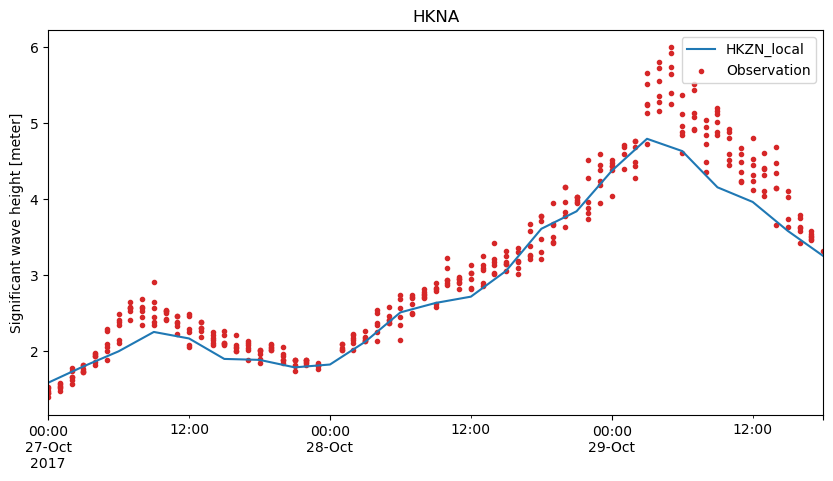

In [15]:
cc["HKNA"].plot_timeseries(figsize=(10,5));

In [16]:
cc["HKNA"].plot_timeseries(width=1000, backend="plotly")

C:\Users\jem\Source\modelskill\modelskill\plot.py:221: UserWarning:

No data for colormapping provided via 'c'. Parameters 'norm' will be ignored



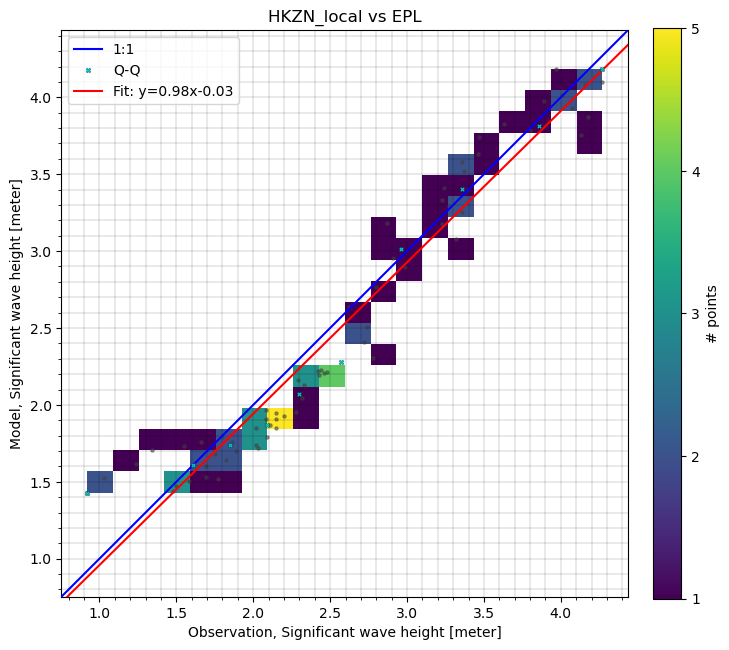

In [17]:
cc["EPL"].scatter(figsize=(8,8), show_hist=True); 

In [18]:
cc["EPL"].scatter(show_hist=True, backend='plotly', width=600, height=600); #,xlim=[-1,11])

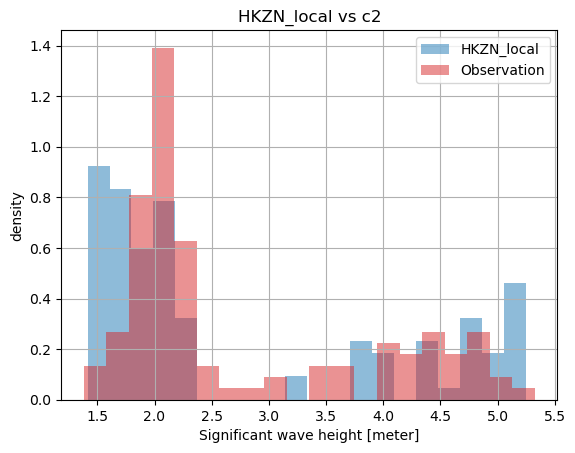

In [19]:
cc["c2"].hist(bins=20);

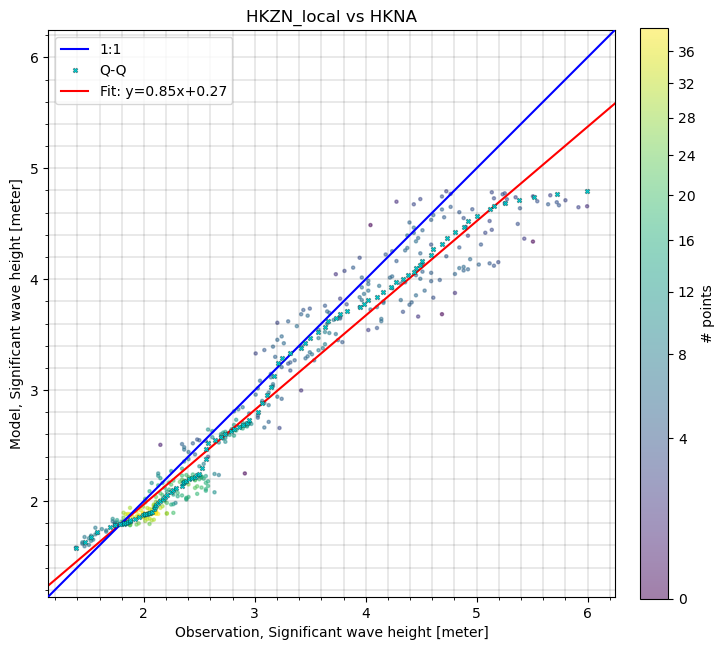

In [20]:
cc["HKNA"].scatter(bins=0.25, cmap="viridis");

## Automatic reporting

In [21]:
from modelskill.report import Reporter
rep = Reporter(con)

In [22]:
%%capture 
rep.to_markdown(); 